<a href="https://colab.research.google.com/github/gabrielddrs/breast-cancer/blob/main/Base_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base Brast Cancer - Classificação Binária

## Etapa 1 - Importação das bibliotecas

In [1]:
!pip install -qU scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import torch
torch.__version__

'2.0.1+cu118'

In [4]:
import torch.nn as nn

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip '/content/drive/MyDrive/cursoDeepLearning/Deep Learing de A à Z com PyTorch.zip' -d '/content/cursoDeepLearning'

Archive:  /content/drive/MyDrive/cursoDeepLearning/Deep Learing de A à Z com PyTorch.zip
   creating: /content/cursoDeepLearning/Bases/
  inflating: /content/cursoDeepLearning/Bases/petr4_teste.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._petr4_teste.csv  
  inflating: /content/cursoDeepLearning/Bases/.DS_Store  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._.DS_Store  
  inflating: /content/cursoDeepLearning/Bases/poluicao.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._poluicao.csv  
  inflating: /content/cursoDeepLearning/Bases/personagens.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._personagens.csv  
  inflating: /content/cursoDeepLearning/Bases/autos.csv  
  inflating: /content/cursoDeepLearning/Bases/iris.csv  
  inflating: /content/cursoDeepLearning/Bases/games.csv  
  inflating: /content/cursoDeepLearning/Bases/petr4_treinamento.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._petr4_treinamento.csv  
 

## Etapa 2 - Base de dados

In [7]:
# Definindo a semente geradora aleatória
np.random.seed(123)

# Sempre ter o mesmo resultado
torch.manual_seed(123)

In [8]:
np.random.seed(55)
np.random.randint(100)

77

In [9]:
previsores = pd.read_csv('/content/cursoDeepLearning/Bases/entradas_breast.csv')
classe = pd.read_csv('/content/cursoDeepLearning/Bases/saidas_breast.csv')

In [10]:
previsores.shape

(569, 30)

In [11]:
previsores.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,109.00000,0.11270,74.00000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,235.0000,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,539.0000,206.0000,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,203.0000,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1058.0000,1105.0000,221.0000,0.4366,0.20750


In [12]:
classe.shape

(569, 1)

In [13]:
classe.sample(10)

,0
448,1
524,1
545,1
353,0
173,1
30,0
460,0
34,0
329,0
410,1


In [14]:
# Conferindo quantos valores únicos
np.unique(classe)

array([0, 1])

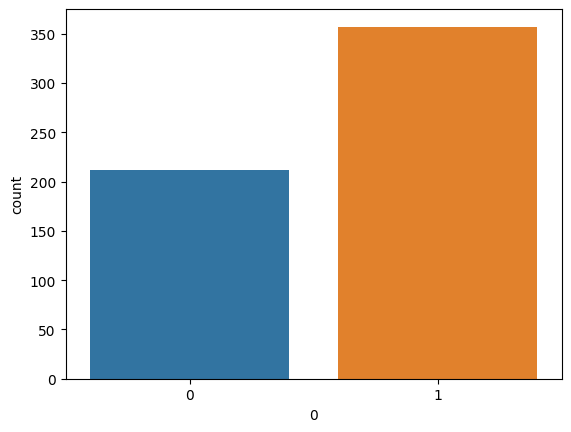

In [15]:
sns.countplot(x=classe['0']);

In [16]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste =  train_test_split(previsores,
                                                                                               classe,
                                                                                               test_size=0.20)

In [17]:
previsores_treinamento.shape

(455, 30)

In [18]:
classe_treinamento.shape

(455, 1)

In [19]:
previsores_teste.shape

(114, 30)

In [20]:
classe_teste.shape

(114, 1)

## Etapa 3 - Transformação dos dados para tensores

In [21]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [22]:
# Convertendo de pandas para numpy
type(np.array(previsores_treinamento))

numpy.ndarray

In [23]:
# Convertendo de Numpy para Tensor
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)


In [24]:
type(previsores_treinamento)

torch.Tensor

In [25]:
type(classe_treinamento)

torch.Tensor

In [26]:
# Unindo as variáveis
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [27]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [28]:
# Fornecendo um dataloader para realizar as iterações
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
#batch_Size = Vai atualizar os pesos para a quantidade de registros a cada iteração e calcular o erro para cada um deles
# Também mantém um histórico para não repetir os dados

## Etapa 4 - Contrução do modelo

30 -> 16 -> 16 -> 1

---
Neuronios de entrada -> Camada oculta -> Camada Oculta -> Saída

---
Fórmula de definição das camadas: (Entrada + Saida) / 2 -> (30 + 1) / 2 = 16

---

OBS: Na camade entrada você sempre terá a mesma quantidade de neurónios e de atributos

In [29]:
classificador = nn.Sequential(
    nn.Linear(in_features = 30, out_features = 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [30]:
classificador

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [31]:
# Criando a função de Erro
criterion = nn.BCELoss()

In [32]:
# Criando o optimizador
optimizer = torch.optim.Adam(classificador.parameters(),
                             lr = 0.001,
                             weight_decay=0.0001)
# Carrega os parâmetros de estrutura da RNA
# LR = Learning Rating

## Etapa 5 - Treinamento do modelo

In [33]:
for epochs in range(100):
  running_loss = 0. #Váriavel para erro

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('=' * 10)
    #print(labels)
    optimizer.zero_grad() # Zera os valores acumulados

    #Passando os inputs de valores para o classificador para o treinamento
    outputs = classificador(inputs) # outputs.forward(inputs)

    # Fazendo o cálculo do erro
    loss = criterion(outputs, labels)

    # Realizando o backpropagation para fazer os ajustes dos pesos
    loss.backward()
    optimizer.step() #função que vai atualizar os pesos

    running_loss += loss.item()

  print('Época: {}, Perda: {:.2f}'.format(epochs+1, running_loss/len(train_loader)))

Época: 1, Perda: 8.24
Época: 2, Perda: 2.25
Época: 3, Perda: 0.62
Época: 4, Perda: 0.60
Época: 5, Perda: 0.55
Época: 6, Perda: 0.53
Época: 7, Perda: 0.51
Época: 8, Perda: 0.49
Época: 9, Perda: 0.45
Época: 10, Perda: 0.45
Época: 11, Perda: 0.43
Época: 12, Perda: 0.43
Época: 13, Perda: 0.44
Época: 14, Perda: 0.46
Época: 15, Perda: 0.23
Época: 16, Perda: 0.20
Época: 17, Perda: 0.23
Época: 18, Perda: 0.18
Época: 19, Perda: 0.18
Época: 20, Perda: 0.17
Época: 21, Perda: 0.17
Época: 22, Perda: 0.17
Época: 23, Perda: 0.15
Época: 24, Perda: 0.17
Época: 25, Perda: 0.17
Época: 26, Perda: 0.17
Época: 27, Perda: 0.15
Época: 28, Perda: 0.18
Época: 29, Perda: 0.15
Época: 30, Perda: 0.14
Época: 31, Perda: 0.14
Época: 32, Perda: 0.14
Época: 33, Perda: 0.17
Época: 34, Perda: 0.15
Época: 35, Perda: 0.13
Época: 36, Perda: 0.13
Época: 37, Perda: 0.14
Época: 38, Perda: 0.13
Época: 39, Perda: 0.16
Época: 40, Perda: 0.18
Época: 41, Perda: 0.20
Época: 42, Perda: 0.12
Época: 43, Perda: 0.13
Época: 44, Perda: 0.

## Etapa 6 - Visualização dos pesos

In [34]:
params = list(classificador.parameters())

In [35]:
params

[Parameter containing:
 tensor([[-1.1897e-01, -6.3948e-03, -1.4555e-01, -1.3317e-02, -9.1238e-02,
           1.0860e-01, -1.1385e-01, -1.4943e-01, -7.3144e-02,  4.7580e-02,
          -7.3649e-02,  5.5899e-02, -1.6089e-01, -1.9197e-01,  2.0716e-03,
           1.6666e-02,  2.3580e-02,  9.6848e-02,  5.0796e-03,  3.4736e-03,
           1.3320e-01,  2.2000e-02, -6.6034e-03,  9.9357e-02, -4.9319e-02,
           9.6047e-03, -2.0450e-01,  1.3164e-02,  9.7061e-02, -1.5757e-01],
         [ 1.8827e-01,  1.7736e-01,  2.7506e-01,  9.0943e-02, -5.9313e-02,
          -1.6618e-01, -1.6863e-01, -7.9526e-02,  3.4903e-02,  8.9238e-02,
          -4.3440e-02, -9.5708e-02, -1.6317e-02,  1.7283e-01, -1.7106e-02,
          -1.9069e-01, -1.2830e-01,  2.6053e-01,  5.1815e-01, -1.9761e-02,
           9.5743e-02,  4.4320e-02,  1.8615e-01,  1.5282e-02,  1.1328e-01,
          -1.0598e-01, -1.4323e-01, -9.0284e-02, -2.2255e-02, -2.1877e-01],
         [ 2.1393e-02,  1.0567e-01, -1.4031e-01, -9.4414e-02, -1.2761e-07,


In [36]:
peso0 = params[0]

In [37]:
peso0.shape

torch.Size([16, 30])

In [38]:
bias0 = params[1]
bias0.shape

torch.Size([16])

## Etapa 7 - Avaliação do modelo

In [39]:
# MUda o modo para avaliação do modelo
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [40]:
# Trasnformando os dados de teste de numpy para torch
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [41]:
type(previsores_teste)

torch.Tensor

In [42]:
# Passa os registros pela rede neural
previsoes = classificador.forward(previsores_teste)

In [43]:
previsores

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [44]:
# Definindo o limiar da classificação
previsoes = np.array(previsoes >= 0.5)
previsoes

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [45]:
acertividade = accuracy_score(classe_teste, previsoes)

In [46]:
acertividade

0.8070175438596491

In [47]:
# Visualizando a a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[35, 15],
       [ 7, 57]])

<Axes: >

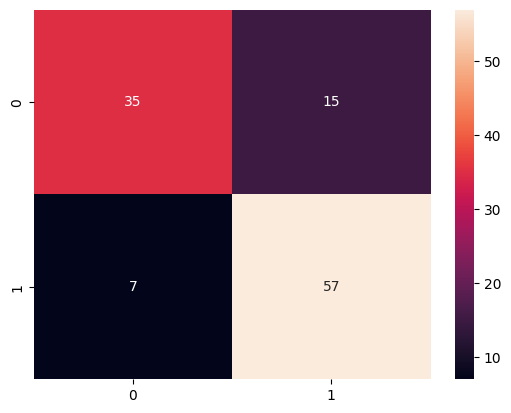

In [48]:
# Matriz em gráfico
sns.heatmap(matriz, annot=True)